In [2]:
import pandas as pd
# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
import os
os.getcwd()

'/Users/andres/Desktop/IE/Capstone Project/Loans'

In [4]:
# settings to show all rows and columns
# you'll need to be extra careful to use limit/head and other commands to restrict rows
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

In [5]:
#Reading the csv file
df_main = pd.read_csv("loan.csv", low_memory=False)

In [6]:
# copying data to another variable to avoid any changes to original data
data = df_main.copy()

In [7]:
#Overview of the data set
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#Size of the data set
data.shape

(887379, 74)

In [9]:
#Information of the data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           887379 non-null  int64  
 1   member_id                    887379 non-null  int64  
 2   loan_amnt                    887379 non-null  float64
 3   funded_amnt                  887379 non-null  float64
 4   funded_amnt_inv              887379 non-null  float64
 5   term                         887379 non-null  object 
 6   int_rate                     887379 non-null  float64
 7   installment                  887379 non-null  float64
 8   grade                        887379 non-null  object 
 9   sub_grade                    887379 non-null  object 
 10  emp_title                    835917 non-null  object 
 11  emp_length                   842554 non-null  object 
 12  home_ownership               887379 non-null  object 
 13 

In [10]:
#check for null values in each variable
data.isnull().sum()

id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       51462
emp_length                      44825
home_ownership                      0
annual_inc                          4
verification_status                 0
issue_d                             0
loan_status                         0
pymnt_plan                          0
url                                 0
desc                           761351
purpose                             0
title                             152
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        29
earliest_cr_

In [11]:
#Deleting useless columns for the analysis
df_clean = data.drop(columns=['earliest_cr_line', 'funded_amnt', 'funded_amnt_inv', 'inq_last_6mths', 'sub_grade', 'url', 'inq_fi', 'total_cu_tl', 'inq_last_12m','open_acc_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi','desc', 'zip_code', 'pub_rec', 'dti_joint', 'member_id', 'id', 'total_pymnt', 'total_rec_late_fee', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'tot_coll_amt','open_il_6m', 'total_rev_hi_lim'])

In [12]:
#Checking the size of the data set after deleting the variables
df_clean.shape

(887379, 42)

In [13]:
#Taking a look at the new data set
df_clean.head()

,loan_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,mths_since_last_delinq,mths_since_last_record,open_acc,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt_inv,total_rec_prncp,total_rec_int,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,policy_code,application_type,annual_inc_joint,verification_status_joint,acc_now_delinq,tot_cur_bal
0,5000.0,36 months,10.65,162.87,B,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,credit_card,Computer,AZ,27.65,0.0,NaN,NaN,3.0,13648.0,83.7,9.0,f,0.0,0.0,5831.78,5000.00,861.07,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,1.0,INDIVIDUAL,NaN,NaN,0.0,NaN
1,2500.0,60 months,15.27,59.83,C,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,car,bike,GA,1.00,0.0,NaN,NaN,3.0,1687.0,9.4,4.0,f,0.0,0.0,1008.71,456.46,435.17,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,1.0,INDIVIDUAL,NaN,NaN,0.0,NaN
2,2400.0,36 months,15.96,84.33,C,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,small_business,real estate business,IL,8.72,0.0,NaN,NaN,2.0,2956.0,98.5,10.0,f,0.0,0.0,3003.65,2400.00,603.65,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,1.0,INDIVIDUAL,NaN,NaN,0.0,NaN
3,10000.0,36 months,13.49,339.31,C,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,other,personel,CA,20.00,0.0,35.0,NaN,10.0,5598.0,21.0,37.0,f,0.0,0.0,12226.30,10000.00,2209.33,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,1.0,INDIVIDUAL,NaN,NaN,0.0,NaN
4,3000.0,60 months,12.69,67.79,B,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,other,Personal,OR,17.94,0.0,38.0,NaN,15.0,27783.0,53.9,38.0,f,766.9,766.9,3242.17,2233.10,1009.07,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,1.0,INDIVIDUAL,NaN,NaN,0.0,NaN


In [14]:
#Defining data frame
df = pd.DataFrame(df_clean)

In [15]:
#Updating term column to just numeric
df['duration_numeric'] = df_clean['term'].apply(lambda x: int(x.split()[0]))

In [16]:
df_clean['term'] = df_clean['term'].apply(lambda x: int(x.split()[0]))

In [17]:
#Taking a look to see if therm column updated correctly
df_clean.head()

,loan_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,mths_since_last_delinq,mths_since_last_record,open_acc,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt_inv,total_rec_prncp,total_rec_int,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,policy_code,application_type,annual_inc_joint,verification_status_joint,acc_now_delinq,tot_cur_bal,duration_numeric
0,5000.0,36,10.65,162.87,B,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,credit_card,Computer,AZ,27.65,0.0,NaN,NaN,3.0,13648.0,83.7,9.0,f,0.0,0.0,5831.78,5000.00,861.07,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,1.0,INDIVIDUAL,NaN,NaN,0.0,NaN,36
1,2500.0,60,15.27,59.83,C,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,car,bike,GA,1.00,0.0,NaN,NaN,3.0,1687.0,9.4,4.0,f,0.0,0.0,1008.71,456.46,435.17,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,1.0,INDIVIDUAL,NaN,NaN,0.0,NaN,60
2,2400.0,36,15.96,84.33,C,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,small_business,real estate business,IL,8.72,0.0,NaN,NaN,2.0,2956.0,98.5,10.0,f,0.0,0.0,3003.65,2400.00,603.65,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,1.0,INDIVIDUAL,NaN,NaN,0.0,NaN,36
3,10000.0,36,13.49,339.31,C,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,other,personel,CA,20.00,0.0,35.0,NaN,10.0,5598.0,21.0,37.0,f,0.0,0.0,12226.30,10000.00,2209.33,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,1.0,INDIVIDUAL,NaN,NaN,0.0,NaN,36
4,3000.0,60,12.69,67.79,B,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,other,Personal,OR,17.94,0.0,38.0,NaN,15.0,27783.0,53.9,38.0,f,766.9,766.9,3242.17,2233.10,1009.07,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,1.0,INDIVIDUAL,NaN,NaN,0.0,NaN,60


In [18]:
#Creating dummie variables for columns Grade and Home Ownership
df_dummies = pd.get_dummies(df_clean, columns=['grade', 'home_ownership'])

In [19]:
selected_columns = ['grade_A', 'grade_B', 'grade_C','grade_D','grade_E','grade_F','grade_G','home_ownership_ANY', 'home_ownership_MORTGAGE', 'home_ownership_NONE', 'home_ownership_OTHER', 'home_ownership_OWN','home_ownership_RENT']

In [20]:
df_selected = df_dummies[selected_columns]

In [21]:
#Taking a look at the new dummie variables
df_selected.head()

,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,0,0,1


In [22]:
#Including dummie variables in the data set
df_clean=pd.concat([df_clean, df_selected], axis=1)

In [23]:
#Overview of the updated data set
df_clean.head()

,loan_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,mths_since_last_delinq,mths_since_last_record,open_acc,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt_inv,total_rec_prncp,total_rec_int,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,policy_code,application_type,annual_inc_joint,verification_status_joint,acc_now_delinq,tot_cur_bal,duration_numeric,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,5000.0,36,10.65,162.87,B,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,credit_card,Computer,AZ,27.65,0.0,NaN,NaN,3.0,13648.0,83.7,9.0,f,0.0,0.0,5831.78,5000.00,861.07,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,1.0,INDIVIDUAL,NaN,NaN,0.0,NaN,36,0,1,0,0,0,0,0,0,0,0,0,0,1
1,2500.0,60,15.27,59.83,C,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,car,bike,GA,1.00,0.0,NaN,NaN,3.0,1687.0,9.4,4.0,f,0.0,0.0,1008.71,456.46,435.17,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,1.0,INDIVIDUAL,NaN,NaN,0.0,NaN,60,0,0,1,0,0,0,0,0,0,0,0,0,1
2,2400.0,36,15.96,84.33,C,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,small_business,real estate business,IL,8.72,0.0,NaN,NaN,2.0,2956.0,98.5,10.0,f,0.0,0.0,3003.65,2400.00,603.65,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,1.0,INDIVIDUAL,NaN,NaN,0.0,NaN,36,0,0,1,0,0,0,0,0,0,0,0,0,1
3,10000.0,36,13.49,339.31,C,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,other,personel,CA,20.00,0.0,35.0,NaN,10.0,5598.0,21.0,37.0,f,0.0,0.0,12226.30,10000.00,2209.33,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,1.0,INDIVIDUAL,NaN,NaN,0.0,NaN,36,0,0,1,0,0,0,0,0,0,0,0,0,1
4,3000.0,60,12.69,67.79,B,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,other,Personal,OR,17.94,0.0,38.0,NaN,15.0,27783.0,53.9,38.0,f,766.9,766.9,3242.17,2233.10,1009.07,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,1.0,INDIVIDUAL,NaN,NaN,0.0,NaN,60,0,1,0,0,0,0,0,0,0,0,0,0,1


In [24]:
#Size of the updated data set including the dummie variables
df_clean.shape

(887379, 56)

In [25]:
#Exporting the data set to a csv file
df_clean.to_csv("df_clean.csv", index=False)

## Get a shorter and accurate dataset

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso
from sklearn.preprocessing import StandardScaler

In [27]:
# Load the balanced dataset
balancedb = pd.read_csv('/Users/andres/Desktop/IE/Capstone Project/Loans/loan_b.csv', low_memory=False)

# Assuming 'loan_status' is your target variable
# Rename the target column if needed (optional step, depending on your CSV structure)
balancedb_df = pd.DataFrame(balancedb)
balancedb_df['loan_default'] = balancedb['loan_status']

# Preview the DataFrame
print(balancedb_df.head())

   loan_amnt  term  int_rate  installment grade                 emp_title emp_length home_ownership  annual_inc verification_status   issue_d pymnt_plan             purpose                    title addr_state    dti  delinq_2yrs  mths_since_last_delinq  mths_since_last_record  open_acc  revol_bal  revol_util  total_acc initial_list_status  out_prncp  out_prncp_inv  total_pymnt_inv  total_rec_prncp  total_rec_int  recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt next_pymnt_d last_credit_pull_d  policy_code application_type  annual_inc_joint verification_status_joint  acc_now_delinq  tot_cur_bal  duration_numeric  grade_A  grade_B  grade_C  grade_D  grade_E  grade_F  grade_G  home_ownership_ANY  home_ownership_MORTGAGE  home_ownership_NONE  home_ownership_OTHER  home_ownership_OWN  home_ownership_RENT  loan_status  loan_default
0    30000.0    60     12.29       671.74     C       Sr. Program Manager   < 1 year       MORTGAGE    150000.0     Source Verified  Jul-2015    

In [28]:
#Selecting just the numeric data 
numeric_data = balancedb.select_dtypes(include=['number'])

In [29]:
#Overview of the numeric data
numeric_data.head()

,loan_amnt,term,int_rate,installment,annual_inc,dti,delinq_2yrs,mths_since_last_delinq,mths_since_last_record,open_acc,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt_inv,total_rec_prncp,total_rec_int,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,annual_inc_joint,acc_now_delinq,tot_cur_bal,duration_numeric,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,loan_status,loan_default
0,30000.0,60,12.29,671.74,150000.0,15.25,0.0,32.0,NaN,11.0,43721.0,75.1,21.0,28139.84,28139.84,3338.22,1860.16,1478.06,0.0,0.0,671.74,1.0,NaN,0.0,336008.0,60,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1,35000.0,36,7.89,1095.00,165000.0,17.64,0.0,NaN,NaN,20.0,40337.0,35.8,52.0,30618.38,30618.38,5459.66,4381.62,1078.04,0.0,0.0,1095.00,1.0,NaN,0.0,416595.0,36,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,27000.0,36,10.99,883.82,60000.0,21.80,0.0,36.0,NaN,9.0,61295.0,78.0,25.0,25072.82,25072.82,2634.98,1927.18,707.80,0.0,0.0,883.82,1.0,NaN,0.0,299303.0,36,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3,22000.0,36,11.53,725.79,60000.0,21.68,0.0,NaN,NaN,14.0,21507.0,53.1,28.0,17188.36,17188.36,6503.93,4811.64,1692.29,0.0,0.0,725.79,1.0,NaN,0.0,89101.0,36,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,9750.0,36,12.99,328.47,400000.0,0.50,1.0,13.0,NaN,4.0,8138.0,66.2,21.0,4801.77,4801.77,6569.40,4948.23,1621.17,0.0,0.0,328.47,1.0,NaN,0.0,220138.0,36,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [30]:
#Choosing the variables we want to include in the new data set
selected_columns = ['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'delinq_2yrs', 'grade_A', 'grade_B', 'grade_C', 'grade_D', 'grade_E', 'grade_F', 'grade_G', 'home_ownership_ANY', 'home_ownership_MORTGAGE', 'home_ownership_NONE', 'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT', 'open_acc', 'loan_status']  # replace with your column names
short_df = numeric_data[selected_columns]

In [31]:
#Overview of the new data set
short_df.head()

,loan_amnt,term,int_rate,installment,annual_inc,delinq_2yrs,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,open_acc,loan_status
0,30000.0,60,12.29,671.74,150000.0,0.0,0,0,1,0,0,0,0,0,1,0,0,0,0,11.0,0
1,35000.0,36,7.89,1095.00,165000.0,0.0,1,0,0,0,0,0,0,0,1,0,0,0,0,20.0,0
2,27000.0,36,10.99,883.82,60000.0,0.0,0,1,0,0,0,0,0,0,1,0,0,0,0,9.0,0
3,22000.0,36,11.53,725.79,60000.0,0.0,0,1,0,0,0,0,0,0,1,0,0,0,0,14.0,0
4,9750.0,36,12.99,328.47,400000.0,1.0,0,1,0,0,0,0,0,0,0,0,0,1,0,4.0,0


In [32]:
#Size of the new data set
short_df.shape

(4063, 21)

In [33]:
# Check for missing values in the new data set
missing_values = short_df.isna().sum()
print('Missing values per column:')
print(missing_values)

Missing values per column:
loan_amnt                  0
term                       0
int_rate                   0
installment                0
annual_inc                 0
delinq_2yrs                0
grade_A                    0
grade_B                    0
grade_C                    0
grade_D                    0
grade_E                    0
grade_F                    0
grade_G                    0
home_ownership_ANY         0
home_ownership_MORTGAGE    0
home_ownership_NONE        0
home_ownership_OTHER       0
home_ownership_OWN         0
home_ownership_RENT        0
open_acc                   0
loan_status                0
dtype: int64


In [34]:
#Export to csv file
short_df.to_csv("short_df.csv", index=False)

## Balance the Dataset 

In [35]:
# Load your dataset
import os
os.getcwd()

'/Users/andres/Desktop/IE/Capstone Project/Loans'

In [36]:
# Load the dataset
df_short = pd.read_csv("short_df.csv", low_memory=False)

In [37]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [38]:
X = df_short.drop(['loan_status'], axis=1)
y = df_short['loan_status']

In [39]:
y.value_counts()

0    2844
1    1219
Name: loan_status, dtype: int64

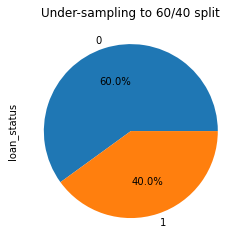

In [40]:
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt

# Create the undersampler object with the desired strategy for 60/40 balance
rus = RandomUnderSampler(sampling_strategy=0.6667, random_state=42)

# Fit and apply the undersampling
X_res, y_res = rus.fit_resample(X, y)

# Plot the distribution of the resampled dataset
ax = y_res.value_counts().plot.pie(autopct='%1.1f%%')
ax.set_title("Under-sampling to 60/40 split")
plt.show()

In [41]:
# Display class distribution
y_res.value_counts()

0    1828
1    1219
Name: loan_status, dtype: int64

In [43]:
# Combine the resampled features and target into a single DataFrame
df_resampled = pd.DataFrame(X_res, columns=X.columns)
df_resampled['loan_status'] = y_res

# Save the resampled DataFrame to a CSV file
df_resampled.to_csv('/Users/andres/Desktop/IE/Capstone Project/Loans/loan_balanced_6040.csv', index=False)

print("Resampled dataset saved successfully.")

Resampled dataset saved successfully.


## Logistic Regression

Confusion Matrix:
 [[820  47]
 [294  58]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.95      0.83       867
           1       0.55      0.16      0.25       352

    accuracy                           0.72      1219
   macro avg       0.64      0.56      0.54      1219
weighted avg       0.68      0.72      0.66      1219

Accuracy Score:
 0.7202625102543068


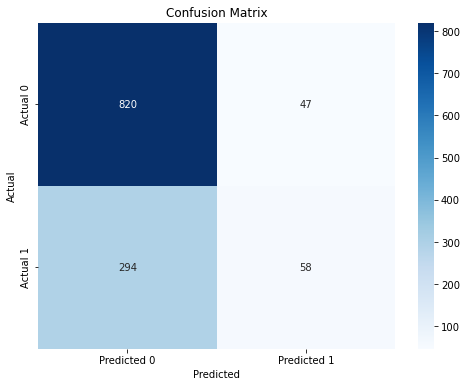

In [44]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# Assuming X and y are your features and labels
# If not already done, split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the logistic regression model
log_reg = LogisticRegression(penalty='l1', solver='liblinear')
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Additional analysis: classification report and accuracy
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:\n", accuracy_score(y_test, y_pred))

# If you want to visualize the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## Logistic Regression with L1 Penalty and SMOTE

Confusion Matrix:
 [[793  74]
 [257  95]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.91      0.83       867
           1       0.56      0.27      0.36       352

    accuracy                           0.73      1219
   macro avg       0.66      0.59      0.60      1219
weighted avg       0.70      0.73      0.69      1219

Accuracy Score:
 0.7284659557013946


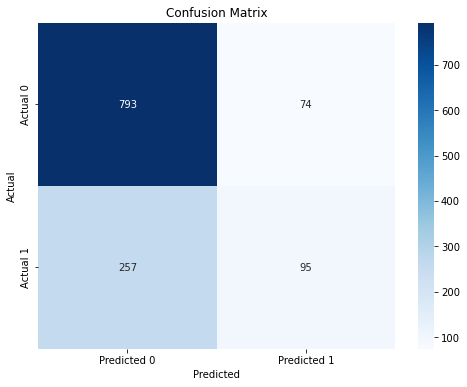

In [45]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Assuming X and y are your features and labels
# If not already done, split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Fit the logistic regression model with L1 penalty on resampled data
log_reg_smote = LogisticRegression(penalty='l1', solver='liblinear')
log_reg_smote.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = log_reg_smote.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Additional analysis: classification report and accuracy
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:\n", accuracy_score(y_test, y_pred))

# If you want to visualize the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [46]:
# Display coefficients
coefficients = pd.Series(log_reg.coef_[0], index=df_short.columns[:-1])
print("L1 Penalty Coefficients:\n", coefficients)


L1 Penalty Coefficients:
 loan_amnt                 -0.000009
term                       0.002157
int_rate                   0.144914
installment                0.000330
annual_inc                -0.000003
delinq_2yrs                0.082074
grade_A                   -0.432577
grade_B                    0.057460
grade_C                    0.060253
grade_D                    0.000000
grade_E                   -0.123489
grade_F                   -0.644522
grade_G                   -0.234283
home_ownership_ANY         0.000000
home_ownership_MORTGAGE   -0.238343
home_ownership_NONE        0.000000
home_ownership_OTHER       0.000000
home_ownership_OWN        -0.585905
home_ownership_RENT        0.000000
open_acc                   0.026595
dtype: float64


In [47]:
# Non-zero coefficients
non_zero_coefficients = coefficients[coefficients != 0]
print("Non-zero Coefficients:\n", non_zero_coefficients)

Non-zero Coefficients:
 loan_amnt                 -0.000009
term                       0.002157
int_rate                   0.144914
installment                0.000330
annual_inc                -0.000003
delinq_2yrs                0.082074
grade_A                   -0.432577
grade_B                    0.057460
grade_C                    0.060253
grade_E                   -0.123489
grade_F                   -0.644522
grade_G                   -0.234283
home_ownership_MORTGAGE   -0.238343
home_ownership_OWN        -0.585905
open_acc                   0.026595
dtype: float64


## Random Forest

Confusion Matrix:
 [[764 103]
 [252 100]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.88      0.81       867
           1       0.49      0.28      0.36       352

    accuracy                           0.71      1219
   macro avg       0.62      0.58      0.59      1219
weighted avg       0.68      0.71      0.68      1219

Accuracy Score:
 0.7087776866283839


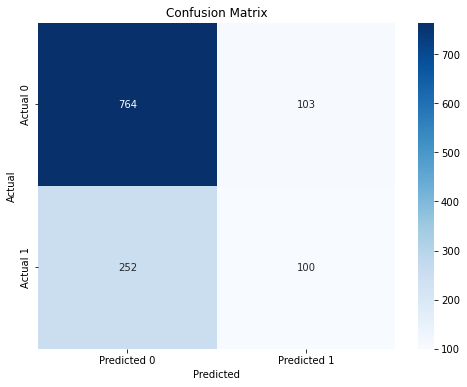

In [48]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# Assuming X and y are your features and labels
# If not already done, split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the Random Forest classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

# Make predictions
y_pred = rf_clf.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Additional analysis: classification report and accuracy
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:\n", accuracy_score(y_test, y_pred))

# If you want to visualize the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Random Forest Using SMOTE

Confusion Matrix:
 [[717 150]
 [229 123]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.83      0.79       867
           1       0.45      0.35      0.39       352

    accuracy                           0.69      1219
   macro avg       0.60      0.59      0.59      1219
weighted avg       0.67      0.69      0.68      1219

Accuracy Score:
 0.6890894175553732


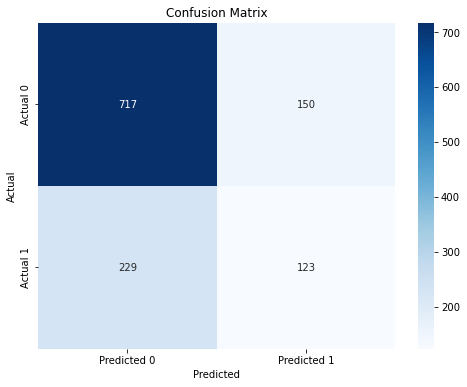

In [49]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Assuming X and y are your features and labels
# If not already done, split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Fit the Random Forest classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = rf_clf.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Additional analysis: classification report and accuracy
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:\n", accuracy_score(y_test, y_pred))

# If you want to visualize the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Random Forest Using SMOTE and GridSearch CV

In [50]:
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

In [51]:
# Create the pipeline
pipeline = make_pipeline(
    SMOTE(random_state=42),
    RandomForestClassifier(class_weight='balanced', random_state=42)
)

In [52]:
# Define the parameter grid
param_grid = {
    'randomforestclassifier__n_estimators': [100, 200, 300],
    'randomforestclassifier__max_depth': [None, 10, 20, 30],
    'randomforestclassifier__min_samples_split': [2, 5, 10],
    'randomforestclassifier__min_samples_leaf': [1, 2, 4]
}

In [53]:
# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='recall', n_jobs=-1, verbose=2)


In [54]:
# Fit the model
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': [None, 10, 20,
                                                               30],
                         'randomforestclassifier__min_samples_leaf': [1, 2, 4],
                         'randomforestclassifier__min_samples_split': [2, 5,
                                                                       10],
                         'randomforestclassifier__n_estimators': [100, 200,
                                                                  300]},
             scoring='recall', verbose=2)

In [55]:
# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

Best parameters found:  {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__n_estimators': 200}


In [56]:
# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print("Accuracy with Best Model:", accuracy_score(y_test, y_pred_best))
print("Classification Report with Best Model:\n", classification_report(y_test, y_pred_best))

Accuracy with Best Model: 0.7030352748154225
Classification Report with Best Model:
               precision    recall  f1-score   support

           0       0.78      0.81      0.80       867
           1       0.48      0.44      0.46       352

    accuracy                           0.70      1219
   macro avg       0.63      0.63      0.63      1219
weighted avg       0.70      0.70      0.70      1219

[CV] END randomforestclassifier__max_depth=None, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100; total time=   0.7s
[CV] END randomforestclassifier__max_depth=None, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=100; total time=   0.6s
[CV] END randomforestclassifier__max_depth=None, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=200; total time